In [1]:
import pandas as pd
from collections import defaultdict as dd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('..')

In [2]:
with open('results/results_prod.csv', 'r', encoding='utf-8') as f:
    data = f.read().split('\n')

data = [x.split(',') for x in data if not x.startswith('#')]
data = [(int(x[3]) - 3, x[8] == 'Соответствует правилу') for x in data if int(x[3]) > 3]

In [3]:
df = pd.read_csv('chunk_includes/metadata.csv')
total = len(df)
num_type = dict()
for row in df.itertuples():
    num_type[row.page] = (row.strong, row.target)

In [4]:
answers = dd(list)
for row in data:
    answers[num_type[row[0]]].append(row[1])

mean = {a: np.mean(answers[a]) for a in answers}

In [5]:
colors = ["#8fd4cb", "#7998cc", "#765fb0", "#f60000"]

In [6]:
def plot(strong: str):
    y = [mean[(strong, target)] for target in ['no', 'target', 'yes']]
    mid = np.mean([y[0], y[2]])
    plt.subplots(figsize=(7, 15))
    plt.bar(['NO', 'TARGET', 'YES'], y, color=colors[:3], width=0.95, zorder=2)
    plt.axhline(y=mid, color=colors[3], linestyle='--', zorder=3)
    plt.rcParams.update({
        'font.family': 'Georgia',
        'xtick.labelsize': 20,
        'ytick.labelsize': 17,
    })
    plt.ylim(0, 1)
    plt.grid(axis='y', zorder=0)
    plt.title(f'(or, {strong})', fontsize=30)
    plt.show()

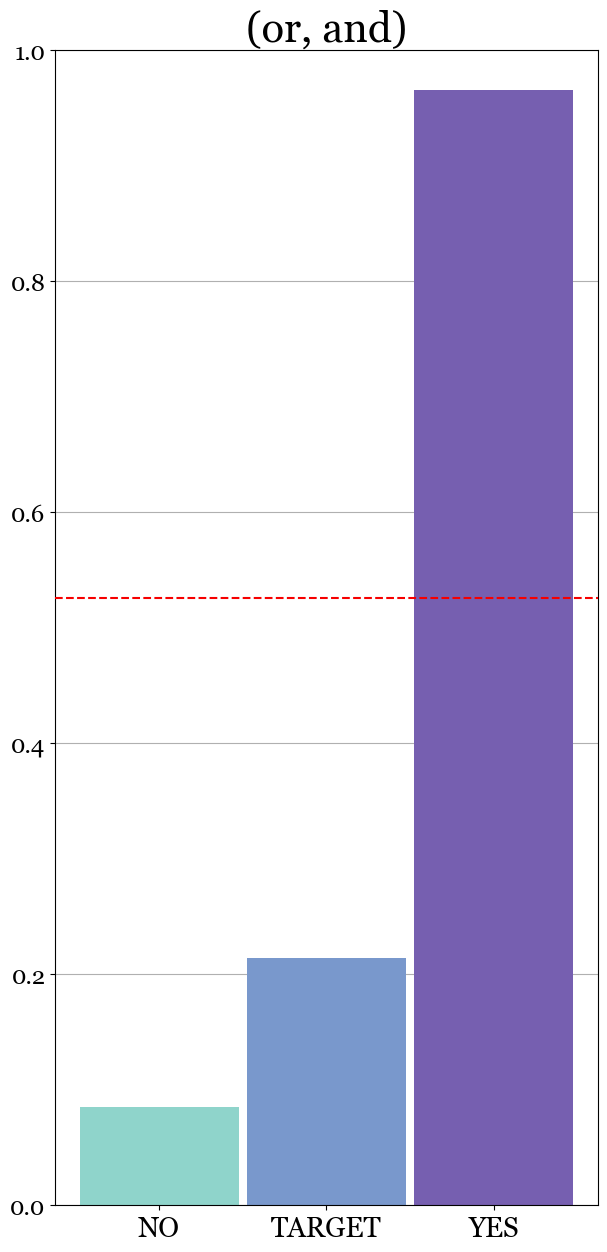

In [9]:
plot('and')

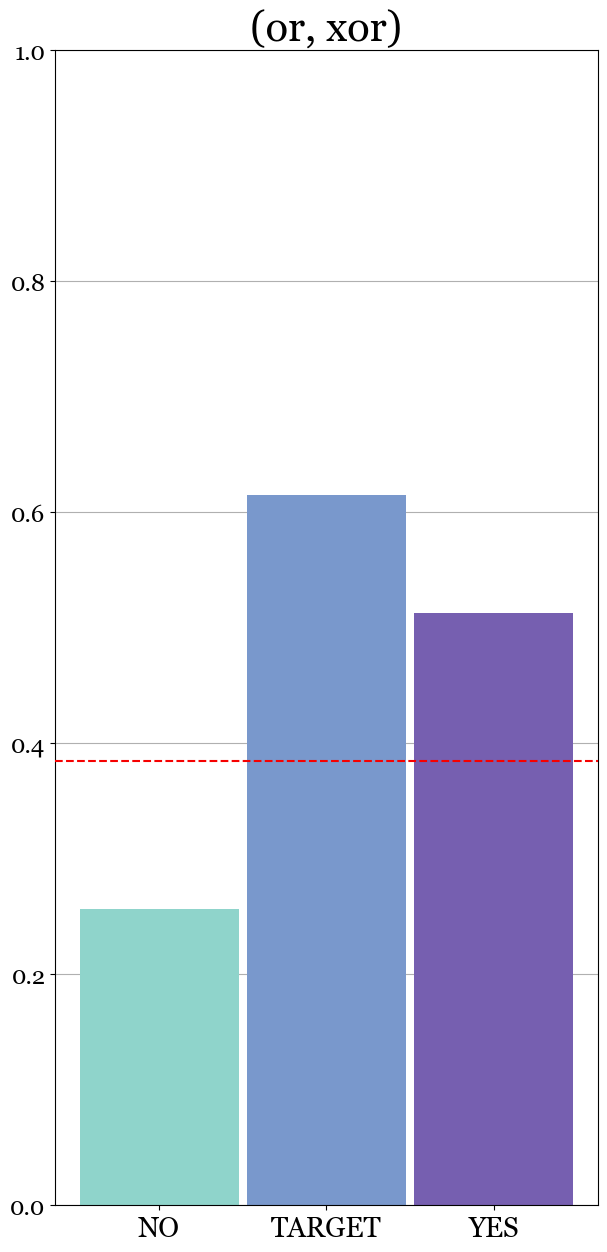

In [8]:
plot('xor')